In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# import our custom code as a module
import assign03 as a3
# force code reload if this cell is run
# this allows to modify the code externally and have the changes reflected here
from importlib import reload
reload(a3)
# tell the notebook to plot the figures inside the notebook
%matplotlib inline

Class instantiated



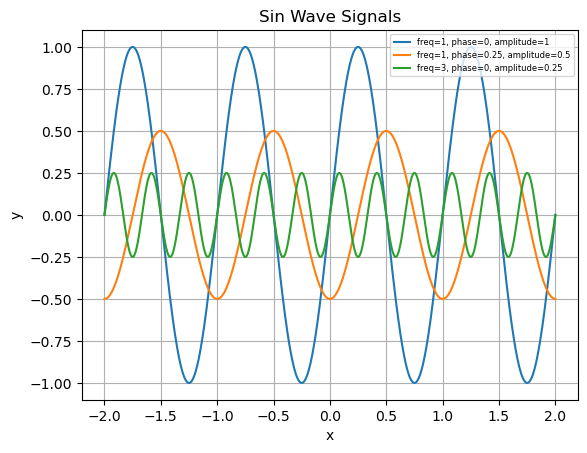

In [2]:
# Compute sin waves and plot
param_array = [[1, 0, 1], [1, 0.25, 0.5], [3, 0, 0.25]]
a3freq = a3.Freq()
x, y = a3freq.siny(param_array)
a3freq.ploty(x, y, param_array)

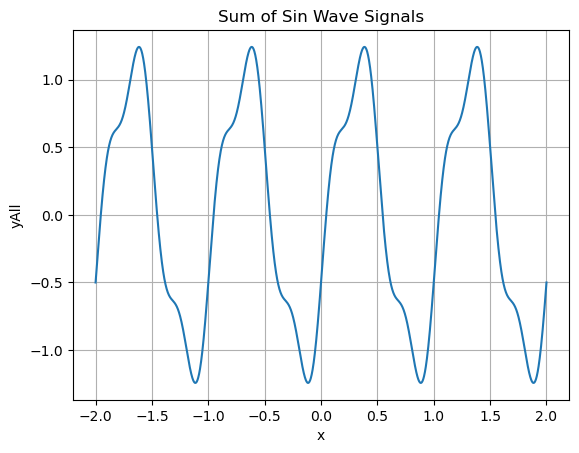

In [3]:
# sum all sin wave signals and plot
yAll = a3freq.sumyAll(x, y)
a3freq.plotFunc(x, yAll)

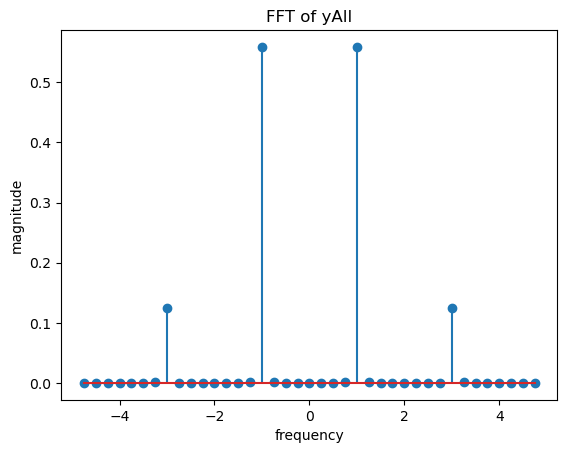

In [4]:
# perform FFT on yAll
freqArray, spMag, spPhase = a3freq.fft1D(x, yAll)
a3freq.plotFFT(freqArray, spMag)


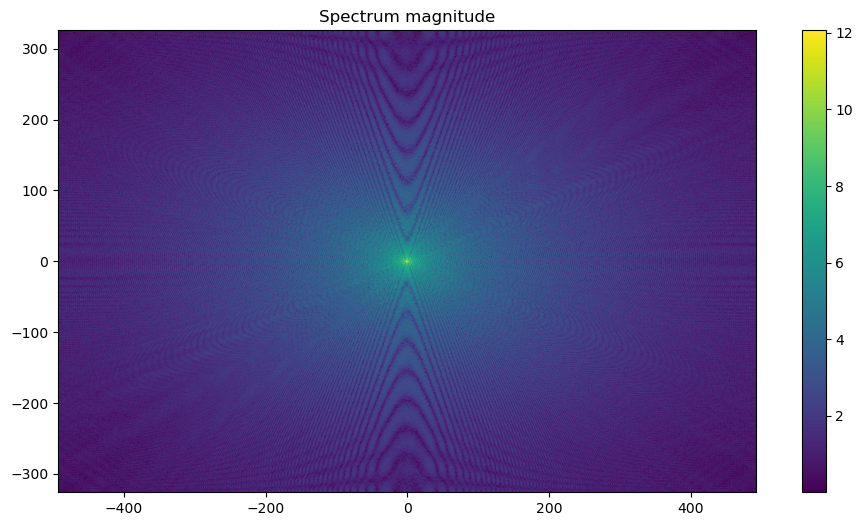

In [5]:
# load image, convert RGB to grayscale, resize to 20% of image
a3img = a3.Image_process('data/68_left.jpeg')
im_orig = a3img.load_image()
imG = a3img.convrgb2gray(im_orig)
imgRet68 = a3img.resz_image(imG)
# perform FFT on 2D image and display
a3freq.plotFFT2d(imgRet68)


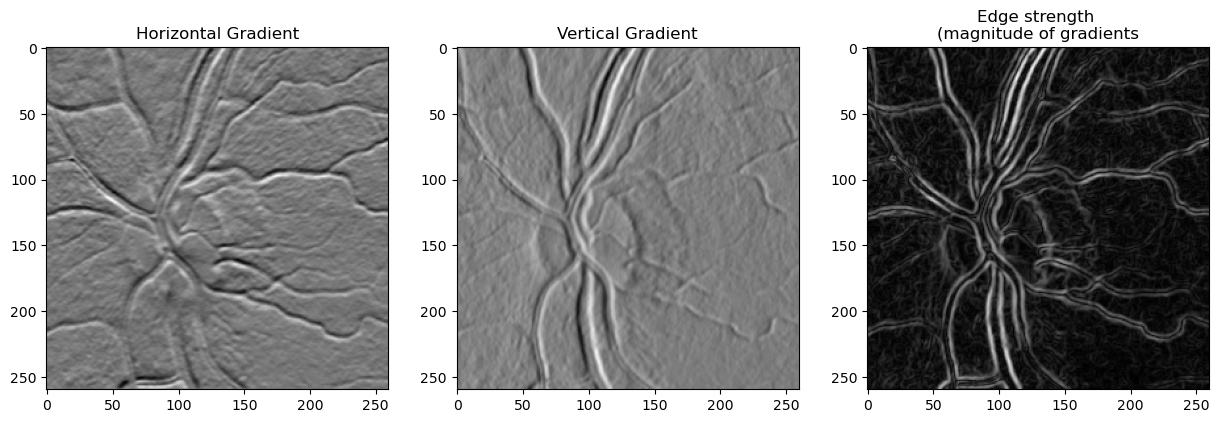

In [6]:
# extract window around optic nerve which is 20% of image height and centered
# around coordinates (313, 357)
imgWind = a3img.extractWindow(imgRet68)
# find horizontal and vertical edges of image using Sobel transform and display
img_hor, img_ver = a3img.horVerImg(imgWind)
# find magnitude of edges and display
L_xy = a3img.magEdges(img_hor, img_ver)
a3img.subplots(img_hor, img_ver, L_xy)

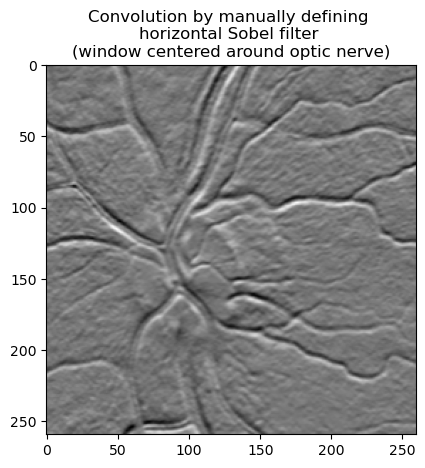

In [7]:
# perform convolution on resized grayscale image by manually defining the horizontal
# Sobel filter
convRes = a3img.convSob(imgRet68)
# display a window of the result of the convolution on the resized grayscale image.
# Window is 20% of the image height and centered around the optic nerve
imgConvWind = a3img.extractWindow(convRes)
plt.title('Convolution by manually defining \nhorizontal Sobel filter \n(window centered around optic nerve)')
plt.imshow(imgConvWind, cmap='gray')
plt.show()

In [8]:
# BONUS POINT
# Measure if there is any difference between the two horizontal gradient
# images (i.e. the one computed with the sobel_h and convolve functions)
img_hor_diff = img_hor - imgConvWind
print('Total difference between the two horizontal gradient images: ', img_hor_diff.sum())

Total difference between the two horizontal gradient images:  -0.49358442399415603


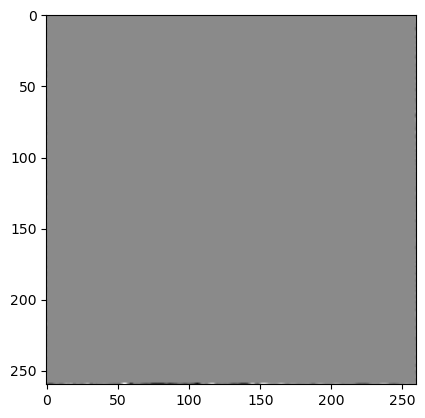

In [9]:
# visualize difference between two horizontal gradient images
plt.imshow(img_hor_diff, cmap='gray')
plt.show()

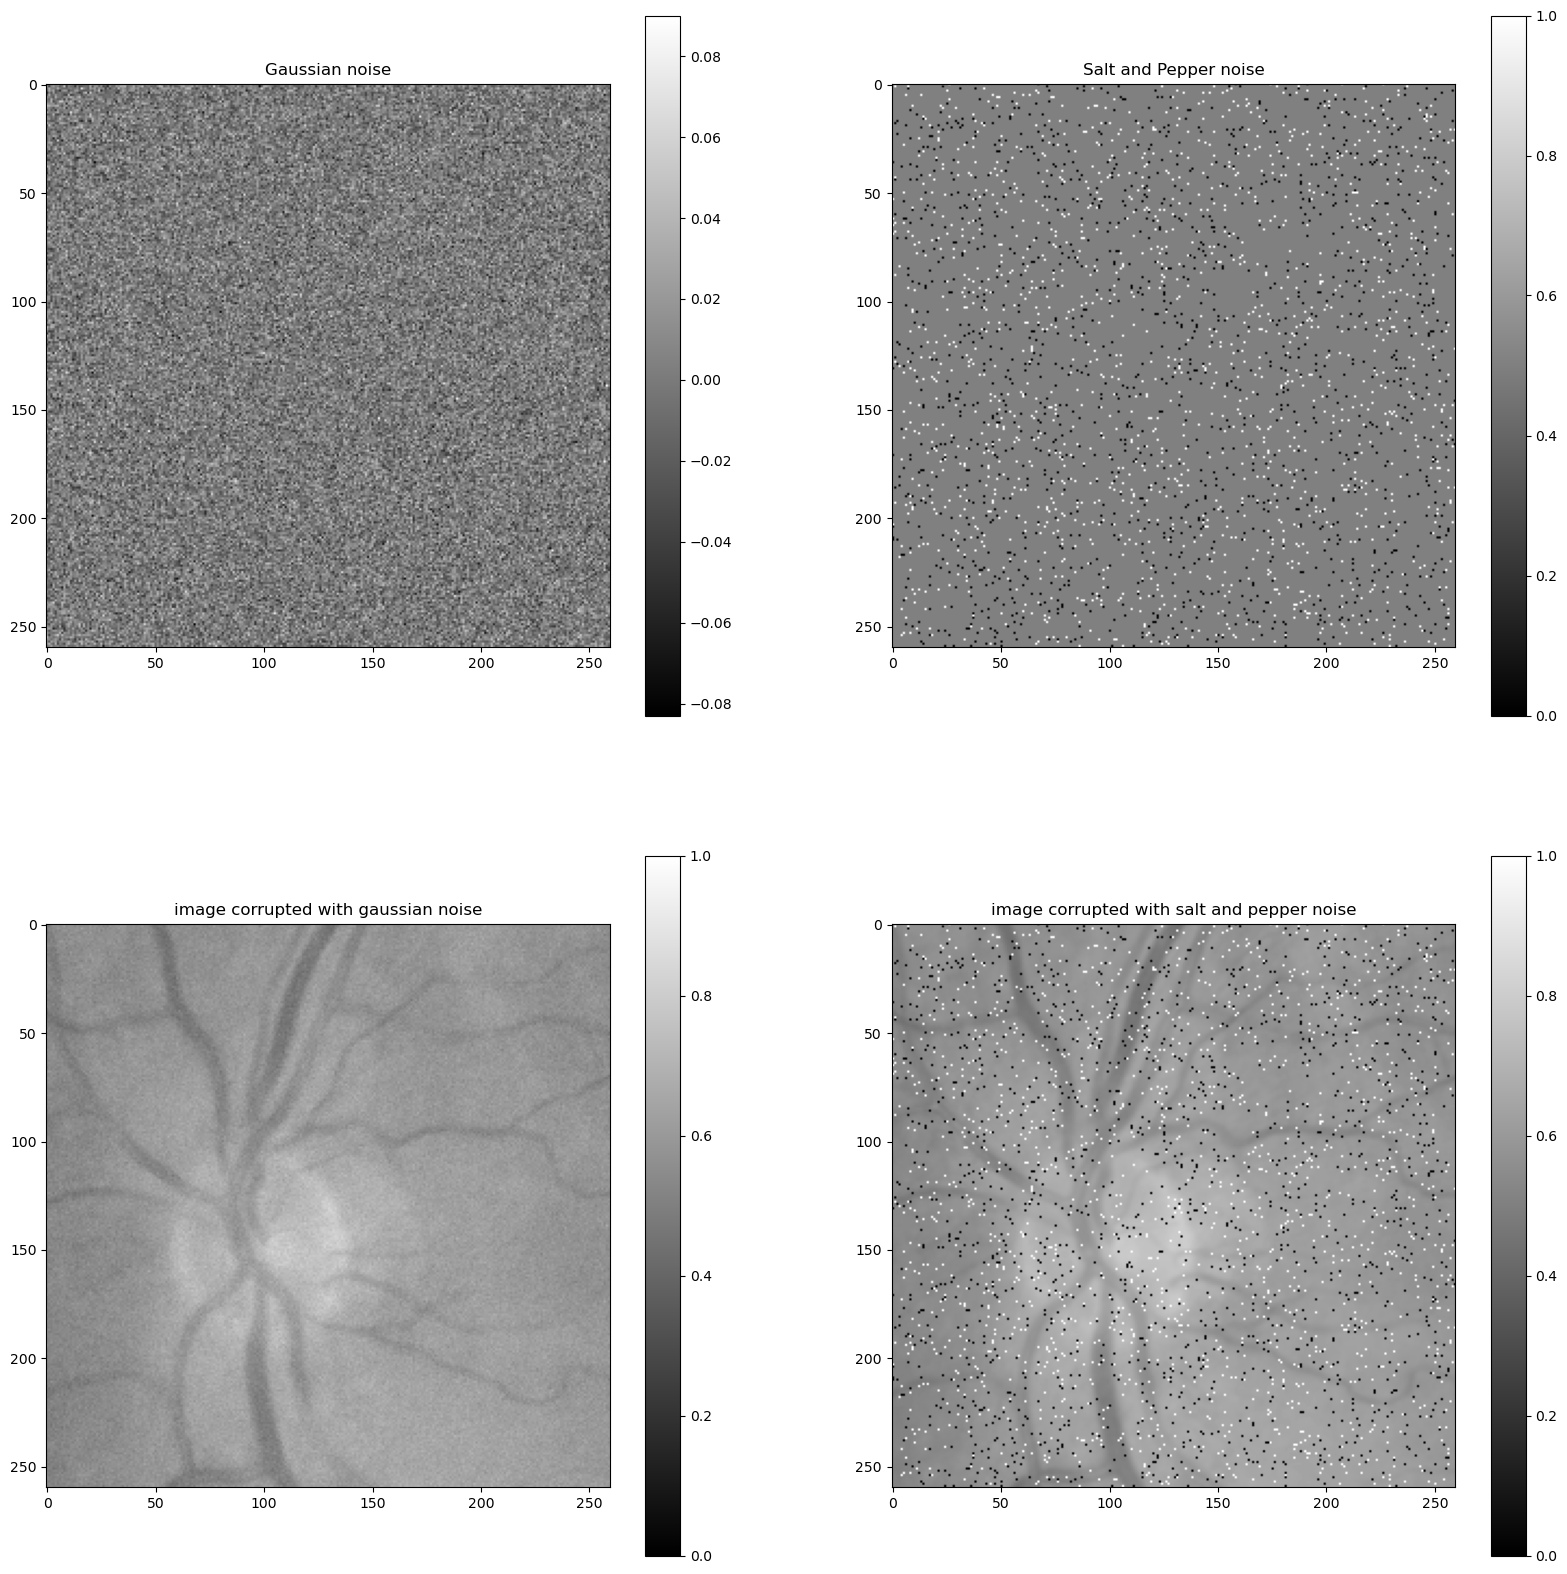

In [10]:
# Generate noise, add noise to image and display
imgNoiseGauss, noiseGauss = a3img.imgWithNoise(imgWind, gauss=1)
imgNoiseSnP, noiseSnP = a3img.imgWithNoise(imgWind, gauss=0)
a3img.dispNoise(noiseGauss, noiseSnP, imgNoiseGauss, imgNoiseSnP)

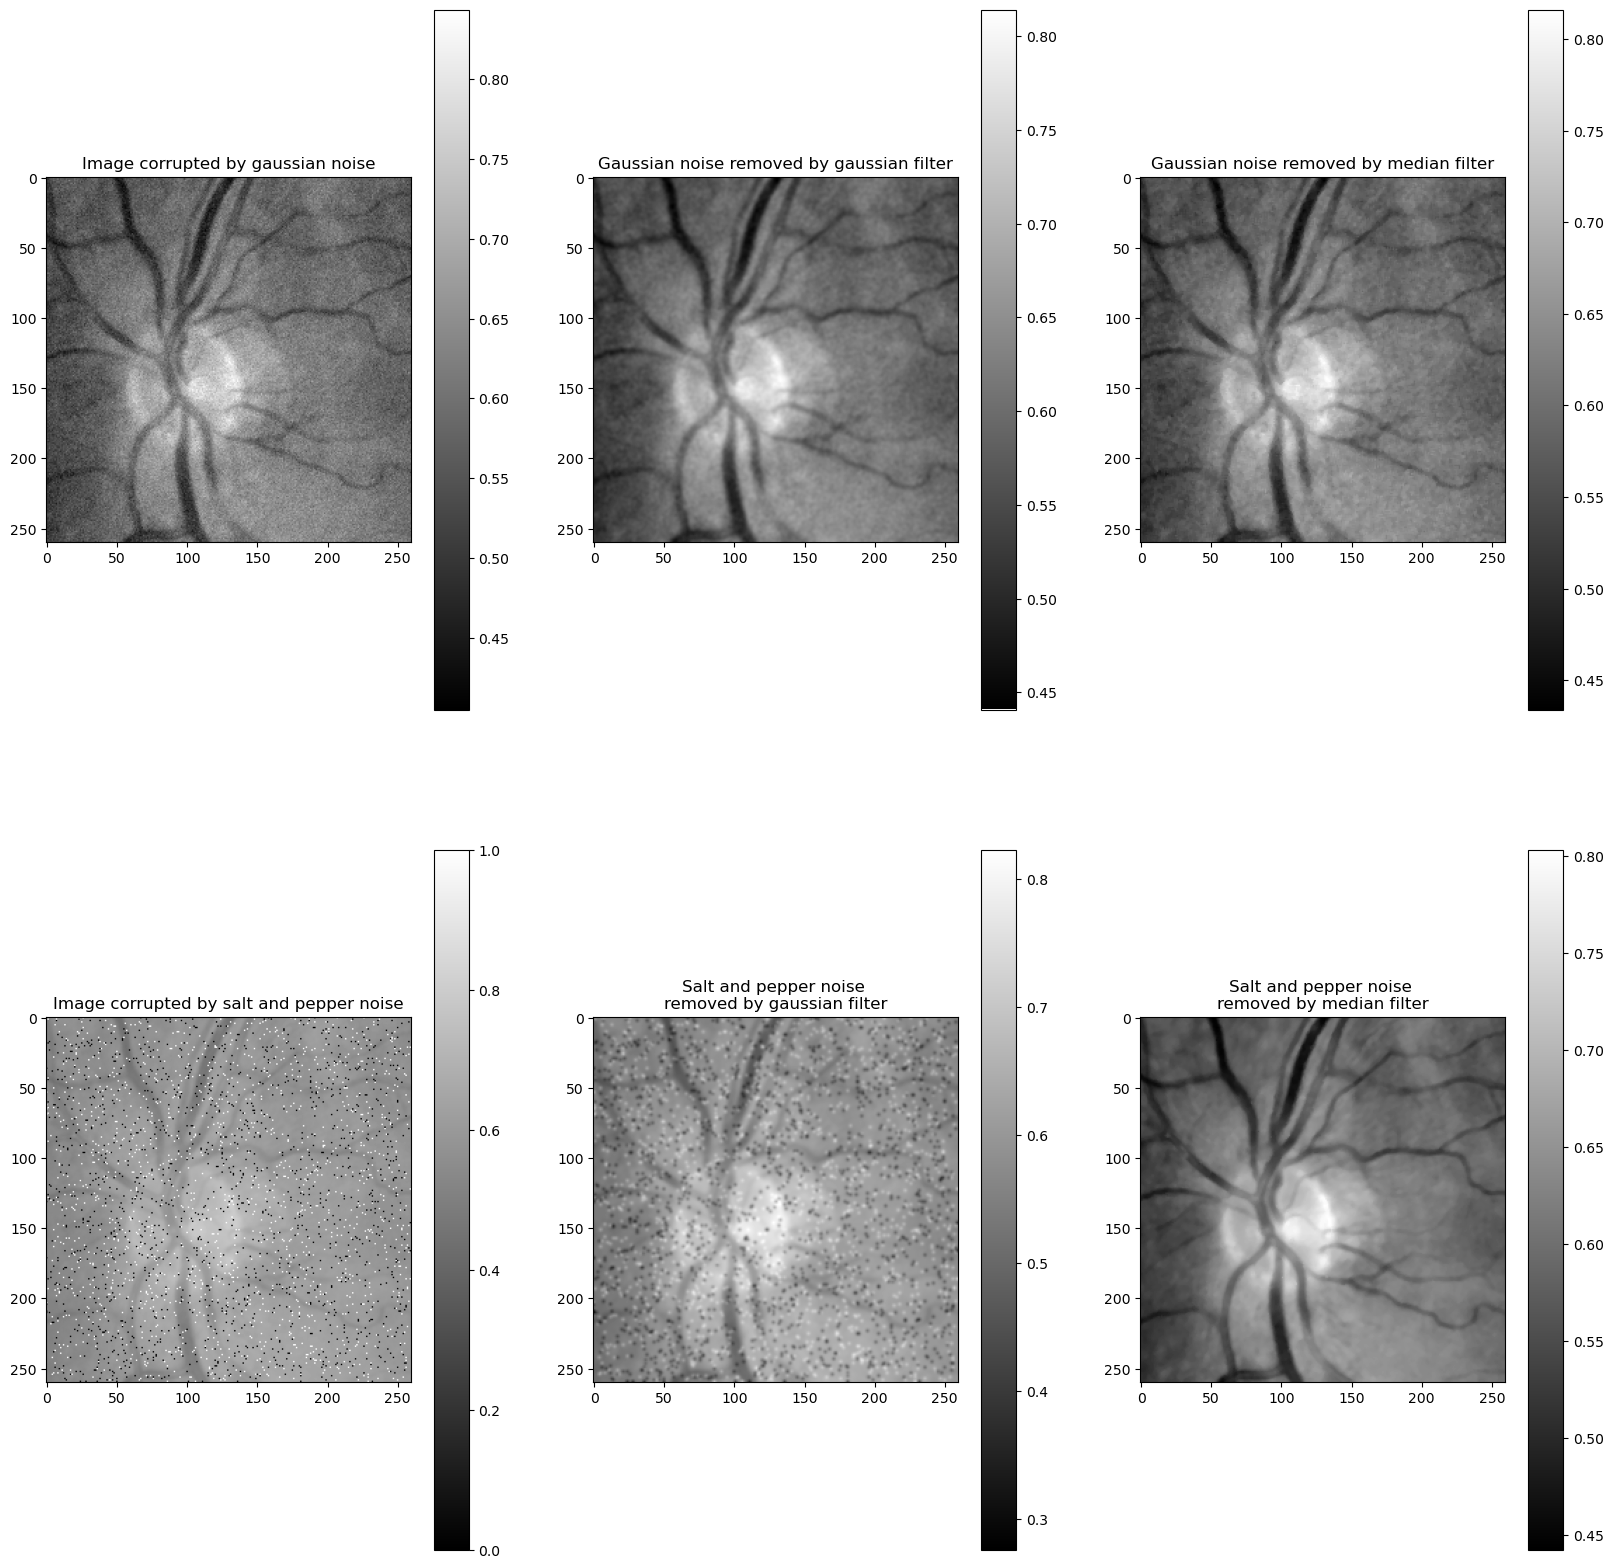

In [11]:
# Apply filter to image corrupted with noise
a3img.gaussMedianFilter(imgNoiseGauss, imgNoiseSnP)

As can be seen in the above plots, applying a Gaussian filter smooths an image corrupted by Gaussian noise. There is not much effect by applying a median filter because a median filter is good for filtering out noise of large magnitude. In the case of salt and pepper noise, the median filter is effective, whereas the Gaussian filter really isn't.

/Users/samiaislam/Documents/bmi6331/A3/assign03.py:187: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  imG = skcol.rgb2gray(img)


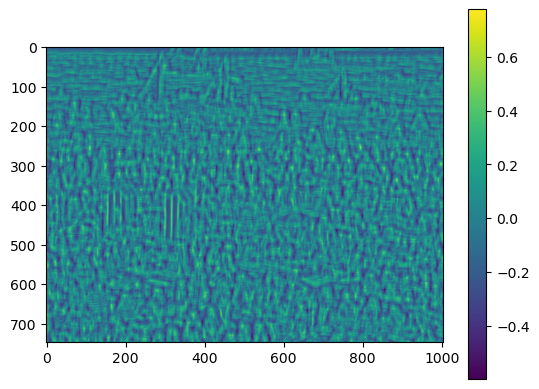

In [12]:
# find Wally. First convert image and template to grayscale. Then perform
# template matching and display
a3wally = a3.Image_process('data/whereiswally.jpg', multIm=True, templateIm='data/wally_template.png')
img_wally, img_wally_t = a3wally.load_image()
img_wallyG = a3wally.convrgb2gray(img_wally)
img_wallyG_t = a3wally.convrgb2gray(img_wally_t)
template_match = a3wally.matchTemplate(img_wallyG, img_wallyG_t)
plt.imshow(template_match)
plt.colorbar()
plt.show()


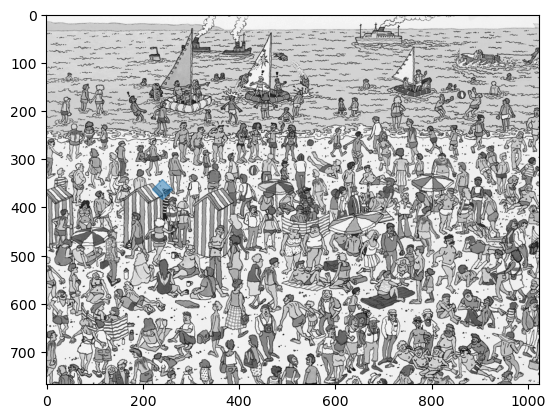

In [13]:
# Find coordinates of maximum point in template matching result and display
x, y = np.unravel_index(np.argmax(template_match), template_match.shape)
plt.imshow(img_wallyG, cmap='gray')
plt.plot(y, x, 'D', ms=10, alpha=0.5)
plt.show()